# Swarm Intelligence - RB414 - February 2025
## Eng. Ahmed Métwalli
## Week 5 - PSO

https://pythonhosted.org/inspyred/examples.html#particle-swarm-optimization

As mentioned earlier:
- We are going to use Inspyred as it offers the following:
    - High-Level Framework for Metaheuristics
        - Built-in Algorithms
        - Benchmarks
    - Reusability and Modularity
        - Components-based design
    - Integration with other libraries/framework

In this lab we are going to tackle a benchmark optimization problem the ackley function:
$$
f(x, y) = -a \exp\!\left(-b \sqrt{\frac{x^2 + y^2}{2}}\right)
          - \exp\!\left(\frac{\cos(c\, x) + \cos(c\, y)}{2}\right)
          + a + e
$$



- Q&A:
    - When searching for the position of the minimum:
        - We should consider f(x,y) != 0 
    - Inertia:
        - Left over velocity (it controls the previous velocity [Omega])
    - r1, r2, c1, c2
    - Termination Conditions:
        - Iterations done 
        - Patiences/Convergences
    - Confusion between Inertia and the last part of velocity?
        - Inertia Coefficient: Omega (w)
            - Limiting the effect of previous velocity on the next velocity
    - All Set (Before Evolve)
    - manual_evolve function

    - What is the difference between different topologies in inspyred?
        - The convergence might be affected due to different toplogy
            - e.g reaching the goal in more or less iterations.
        - By default, it was a Star Toplogy (also in ACO)

    - For Exam:
        - ACO/PSO problem
        - Comparison ACO/PSO (In code and in problem)
        - Code (PSO/ACO)
            - Things that you write from scratch
                - Initialize Swarm
                - Fitness Evaluation (only return problem evaluator)
                - Update Swarm
            - Things that should be added as placehold
                - Communication function (def pass)
                - Termination conditions
            - Plot are not included (i usually give them to you directly)

    - Tolerance Convergence (threshold 1*10^-6): sentivity
        - If the improvement in function minimization is not significant (for example 1*10^-6), therefore it is considered a no imporvement

    - 
    

<img src = 'AckleyFunction.jpg'>

# [View Section Week 4: PSO](SecWeek4.pdf)

Iteration 1: Best Fitness = 6.293405 | Candidate = [1.9164787724250232, 1.1846396190490722]
Iteration 2: Best Fitness = 3.390655 | Candidate = [-1.0520087334942474, -0.15613283752765028]
Iteration 3: Best Fitness = 3.390655 | Candidate = [-1.2947166212241967, 1.0736288993148193]
Iteration 4: Best Fitness = 3.390655 | Candidate = [2.1370387141403313, 1.831416990589787]
Iteration 5: Best Fitness = 3.390655 | Candidate = [-1.5931427472066062, -0.24073932913203322]
Iteration 6: Best Fitness = 3.390655 | Candidate = [-4.114870943188244, -6.16924477745529]
Iteration 7: Best Fitness = 3.390655 | Candidate = [-1.3115667956843637, 1.5626182999799525]
Iteration 8: Best Fitness = 2.900719 | Candidate = [0.10979157933314809, -0.9149041180994999]
Iteration 9: Best Fitness = 2.900719 | Candidate = [-0.04918358705850778, -4.881127455352541]
Iteration 10: Best Fitness = 2.900719 | Candidate = [0.1666578914343475, -2.1794099786686374]
Iteration 11: Best Fitness = 2.900719 | Candidate = [0.9729894193754

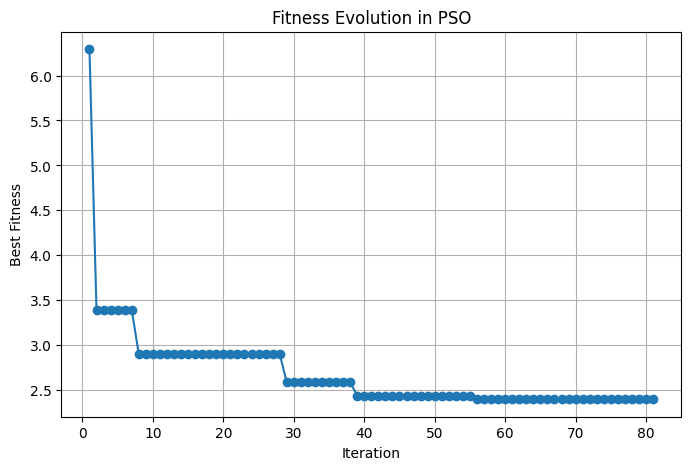

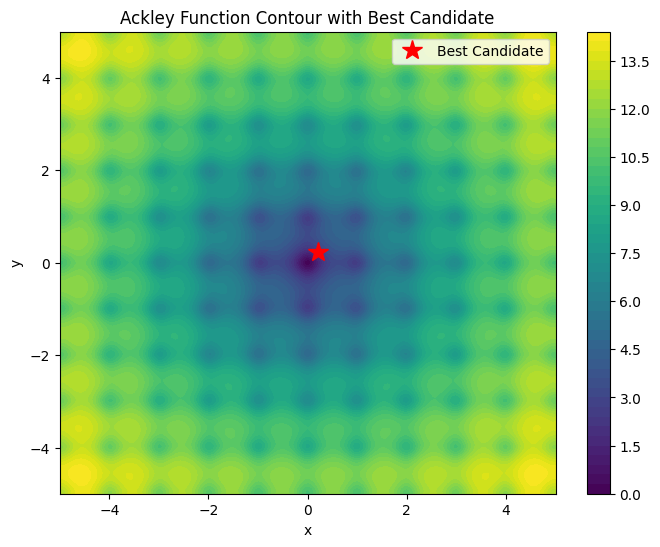

In [ ]:
from random import Random
from time import time
import math
import numpy as np
import matplotlib.pyplot as plt
from inspyred import benchmarks, ec, swarm

###############################################################################
# STEP 1: Initialize Swarm
###############################################################################
def initialize_swarm(prng, dimension): # prng > exploration vs exploitation
    """
    1. Initialize Swarm
       - Define the problem (Ackley benchmark).
       - Instantiate the PSO object with relevant parameters.
       
       Params:
           prng: Pseudo-random number generator.
           dimension: Dimensionality of the problem.
    """
    problem = benchmarks.Ackley(dimension)  # Difficult test function with many local minima
    # For minimization, set maximize to False.
    problem.maximize = False  # minmize the ackley function
    pso = swarm.PSO(prng) # initialize a pso swarm using the instance of PSO (exploration vs exploitation)
    # Use a ring topology for neighbor communication.
    pso.topology = swarm.topologies.ring_topology # ring topology preliminary positions of particles
    # Use the evaluation terminator so we can control the number of generations.
    pso.terminator = ec.terminators.evaluation_termination # Maximum iterations reached
    return pso, problem # pso calculations, problem ackley

###############################################################################
# STEP 2: Evaluate Fitness (optional)
###############################################################################
def evaluate_fitness(problem, candidate):
    """
    2. Evaluate Fitness
       - Use the problem's evaluator to compute fitness for a candidate.
    """
    return problem.evaluator(candidate)
###############################################################################
# STEP 3: Communication (placeholder)
###############################################################################
def communication(pso):
    """
    3. Communication
       - In PSO, particles share information (via the topology) during evolution.
       - This placeholder indicates where additional communication logic could be added.
    """
    pass

###############################################################################
# STEP 4: Update or Manual Evolution Loop Logging Best Fitness
###############################################################################
def manual_evolve(pso, # from swarm instance 
                  problem, # ackley function instance (boundaries and conditions)
                  iterations=100, # maximum number of iterations. Each iteration, the particles does the cycle of communication
                  pop_size=100, # number of particles ()
                  tolerance=1e-6, # Convergence tolerance
                  patience=25): # Early stop (if no improvement in 25 iterations, then stop)
    """
    4. Update or Manual Evolution Loop
       - Run one generation per iteration and log the best fitness. 
       - This function performs:
            - Calls the .evolve mentioned earlier.
            - EC Evolutionary Computation meeting conditions (Patiences and Convergence)
            - Communication
            - Update
       
       Params:
           pso: The PSO instance.
           problem: The optimization problem instance.
           iterations: Maximum number of iterations.
           pop_size: Number of particles.
           tolerance: Minimum improvement required to reset the stagnation counter.
           patience: Maximum iterations allowed with no significant improvement.
    """
    best_fitnesses = [] # List to hold the best fitnesses after each iteration.
    best_candidate_history = [] # position/velocity - for plotting purposes
    overall_best = None # for all particles/iteration (best candidate as velocity/position and best fitness - best f(x) and x position of candidate)
    best_so_far = float('inf')  # for minimization, lower is better
    no_improvement_count = 0 # as a patience counter

    for i in range(iterations):
        pso.evolve(
            # Generator: Produces new candidate solutions.
            # Evaluator: Assesses how good each solution is.
            # Bounder: Keeps solutions within the defined constraints.
            # Maximize: Sets the optimization goal (maximizing fitness, where fitness is defined as the inverse of tour distance).
            # Population Size: Determines how many candidates (ants) are generated per generation.
            # Max Generations: Running one generation at a time enables you to monitor progress and implement early stopping.
            generator=problem.generator, # from ackley problem
            evaluator=problem.evaluator, # return the fitness
            bounder=problem.bounder, # boundaries
            maximize=problem.maximize,
            pop_size=pop_size,
            max_generations=1 # for looping purposes (1 generation per iteration)
        )
        # For minimization, retrieve the candidate with the minimum fitness.
        best_current = min(pso.archive, key=lambda ind: ind.fitness) # finds the individual with the lowest fitness
        current_value = best_current.fitness # best current fitness accross all candidates within same iteration
        improvement = best_so_far - current_value # difference measurement
        
        if improvement > tolerance: # improvement is higher than convergence tolerance
            best_so_far = current_value # Current fitness  f(x)
            overall_best = best_current # Current best candidate (positions of best candidate)
            no_improvement_count = 0 # f(x) is minimized therefore we restart the counter
        else:
            no_improvement_count += 1 # will stop once no improvement reach patience

        best_fitnesses.append(best_so_far)
        best_candidate_history.append(best_current.candidate)
        print(f"Iteration {i+1}: Best Fitness = {best_so_far:.6f} | Candidate = {best_current.candidate}")

        if no_improvement_count >= patience:
            print("No significant improvement detected for", patience, "iterations; stopping early.")
            break

    return best_fitnesses, best_candidate_history, overall_best

###############################################################################
# STEP 5: Meet Termination Conditions (placeholder)
###############################################################################
def meet_termination_conditions(pso):
    """
    5. Meet Termination Conditions
       - In PSO, the terminator is already set via evaluation_termination.
       - This placeholder is for any additional termination logic if needed.
    """
    pass

###############################################################################
# STEP 6: End - Display Final Solution and Plot Convergence
###############################################################################
def display_solution(pso, problem):
    """
    6. End
       - Display the best solution found in pso.archive (LAST generation only).
       - This function is NOT used in Option A, but kept for reference.
    """
    best = min(pso.archive, key=lambda ind: ind.fitness)
    print("Best Solution (candidate vector):")
    print(best.candidate)
    print("Best Fitness (Ackley value):", best.fitness)
    return best.candidate

def plot_fitness(best_fitnesses):
    """
    Plot the convergence of best fitness over iterations.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(best_fitnesses) + 1), best_fitnesses, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness')
    plt.title('Fitness Evolution in PSO')
    plt.grid(True)
    plt.show()

def plot_best_candidate_on_ackley(best_candidate, dimension=2):
    """
    Plot the contour of the Ackley function and mark the best candidate.
    """
    # Define a grid for 2D space
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    
    # Define the Ackley function (2D)
    def ackley(x, y, a=20, b=0.2, c=2*np.pi):
        term1 = -a * np.exp(-b * np.sqrt((x**2 + y**2) / 2))
        term2 = -np.exp((np.cos(c * x) + np.cos(c * y)) / 2)
        return term1 + term2 + a + np.exp(1)
    
    Z = ackley(X, Y)
    
    plt.figure(figsize=(8, 6))
    cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cp)
    plt.plot(best_candidate[0], best_candidate[1], 'r*', markersize=15, label='Best Candidate')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Ackley Function Contour with Best Candidate')
    plt.legend()
    plt.show()

###############################################################################
# Main Function: Assemble the Steps
###############################################################################
prng = Random()
prng.seed(time())

dimension = 2  # For the Ackley function

# 1. Initialize Swarm.
pso, problem = initialize_swarm(prng, dimension) # returns pso system and ackley problem

# 2. (Optional) Evaluate Fitness of a sample candidate.
sample_candidate = problem.generator(prng, {'num_inputs': dimension})
sample_fitness = evaluate_fitness(problem, sample_candidate)
# print("Sample Candidate Fitness:", sample_fitness)

# 3. Communication (placeholder).
communication(pso) # def pass

# 4. Update: Run manual evolution and log best fitness.
best_fitnesses, candidate_history, overall_best = manual_evolve(
    pso,
    problem,
    iterations=100,
    pop_size=100
)

# If we found a best solution, store it; otherwise fall back to last known.
if overall_best is not None:
    best_candidate = overall_best.candidate # positions of best candidates
    best_fitness = overall_best.fitness # best fitness values
else:
    best_candidate = candidate_history[-1] # positions of best candidates based on history
    best_fitness = best_fitnesses[-1] # fitness best based on history

print("\n--- Manually Tracked Global Best ---")
print("Best Overall Candidate:", best_candidate)
print("Best Overall Fitness (Ackley value):", best_fitness)

# 5. Termination Conditions (placeholder).
meet_termination_conditions(pso)

# 6. End: We now ONLY rely on our manually tracked best.
plot_fitness(best_fitnesses) # best fitness over iterations
plot_best_candidate_on_ackley(best_candidate) # dimensions


- Exploration and Exploitation: Early in the run, the swarm rapidly discovers better solutions. This caused large drops in fitness. Later, it focuses on exploiting known good regions, resulting in smaller or no improvements.
- Local Minima vs. Global Minima: If the curve flattens out above 0 (Ackley’s global minimum), it may mean the swarm is stuck in a local minimum or the algorithm simply hasn’t found a better solution yet. More iterations or parameter tuning might yield further improvements.
- Overall Convergence Behavior: The downward trend indicates PSO is doing its job >>> finding progressively better solutions. Once it plateaus, it’s either converged to a local minimum or exhausted its current search capability.

# BONUS EXAMPLE (PID CONTROLLER OPTIMIZATION)

Best PID Parameters (Kp, Ki, Kd): [27.495529801580954, 9.502265887218048, 0.0]
Best Fitness (negative cost): -8.04838589083925
Final cost (ISE + alpha * control^2) = 8.048742


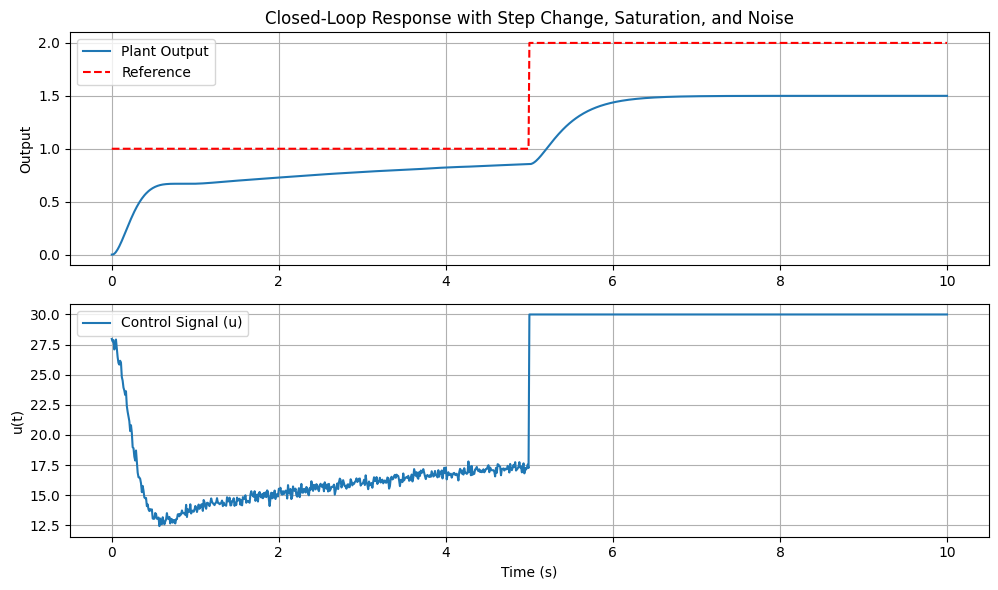

In [ ]:
from random import Random
from time import time
import math
import numpy as np
import matplotlib.pyplot as plt
from inspyred import ec, swarm

###############################################################################
# Discrete-Time Simulation of the Plant + PID (Enhanced)
###############################################################################
def simulate_closed_loop_discrete(Kp, Ki, Kd, # parameters
                                  alpha=0.001,
                                  t_final=10.0,
                                  dt=0.01,
                                  u_sat=30.0,
                                  noise_std=0.0):
    """
    Simulates the closed-loop system (plant + PID controller) in discrete time,
    then computes:
       Cost = ISE + alpha * integral(u^2 dt),
    where:
       - ISE = integral(e^2 dt)
       - e(t) = reference(t) - measured_output(t)
       - measured_output(t) = true_output(t) + noise
       - u(t) = saturate( Kp*e + Ki*integral(e) + Kd*d(e)/dt, +/- u_sat )

    Enhancements:
      1. Step change in reference at t = 5.0 (from 1.0 to 2.0).
      2. Optional saturation on control signal (u_sat).
      3. Measurement noise with std dev noise_std.

    Plant: G(s) = 1 / (s^2 + 10s + 20)
      - State-space form:
           x'(t) = A x(t) + B u(t),
           y(t)  = C x(t).
        A = [[  0,    1 ],
             [-20, -10 ]]
        B = [[0],[1]]
        C = [1, 0], D = 0

    Returns the total cost, time vector, output array, control array.
    """
    N = int(t_final / dt)
    t = np.linspace(0, t_final, N+1)

    # Continuous-time system matrices
    A = np.array([[0, 1],
                  [-20, -10]])
    B = np.array([[0],
                  [1]])
    C = np.array([1, 0])

    # Initialize states
    x = np.array([0.0, 0.0])  # [state1, state2]
    e_int = 0.0               # integral of error
    e_old = 1.0               # assume initial error is 1.0 - 0
    y_list = []
    u_list = []
    e_list = []

    ISE = 0.0    # integral of squared error
    IU2 = 0.0    # integral of squared control
    ref = 1.0    # initial reference

    for i in range(N+1):
        # Time update
        current_time = i * dt
        # Step change in reference at t=5
        if current_time >= 5.0:
            ref = 2.0

        # True plant output
        y_true = C.dot(x)
        # Add measurement noise
        y_meas = y_true + np.random.normal(0, noise_std)

        # Error
        e = ref - y_meas
        e_list.append(e)

        # PID control law
        e_int += e * dt
        e_der = (e - e_old) / dt
        u_raw = Kp*e + Ki*e_int + Kd*e_der

        # Saturate control if needed
        if abs(u_raw) > u_sat:
            u = np.sign(u_raw) * u_sat
        else:
            u = u_raw

        # Log
        y_list.append(y_true)
        u_list.append(u)
        e_old = e

        # Accumulate cost components
        ISE += (e**2) * dt
        IU2 += (u**2) * dt

        # Forward Euler integration for the plant
        x_dot = A.dot(x) + B.dot([u])
        x = x + x_dot * dt

    cost = ISE + alpha * IU2
    return cost, t, np.array(y_list), np.array(u_list)

###############################################################################
# Generator: PID Gains
###############################################################################
def pid_generator(random, args):
    """
    Generate a candidate PID parameter vector [Kp, Ki, Kd].
    Kp, Ki in [0, 50], Kd in [0, 10].
    """
    Kp = random.uniform(0, 50)
    Ki = random.uniform(0, 50)
    Kd = random.uniform(0, 10)
    return [Kp, Ki, Kd]

###############################################################################
# Evaluator: Negative of (ISE + alpha * Control Effort)
###############################################################################
def pid_evaluator(candidates, args):
    """
    For each candidate [Kp, Ki, Kd], run a discrete-time simulation of the plant,
    compute the cost = ISE + alpha * integral(u^2 dt), and return negative cost
    (because inspyred maximizes fitness).

    Additional arguments from args:
      alpha: weighting for control effort penalty
      u_sat: actuator saturation limit
      noise_std: standard deviation of measurement noise
    """
    alpha = args.get('alpha', 0.001)
    u_sat = args.get('u_sat', 30.0)
    noise_std = args.get('noise_std', 0.0)

    fitness = []
    for (Kp, Ki, Kd) in candidates:
        cost, _, _, _ = simulate_closed_loop_discrete(Kp, Ki, Kd,
                                                      alpha=alpha,
                                                      t_final=10.0,
                                                      dt=0.01,
                                                      u_sat=u_sat,
                                                      noise_std=noise_std)
        fitness.append(-cost)  # negative because we want to minimize cost
    return fitness

###############################################################################
# Problem Container
###############################################################################
class PIDProblem:
    pass

###############################################################################
# Main PSO Tuning Function
###############################################################################
prng = Random()
prng.seed(time())

# Create problem instance
problem = PIDProblem()
problem.generator = pid_generator
problem.evaluator = pid_evaluator
problem.bounder = ec.Bounder([0, 0, 0], [50, 50, 10])
problem.maximize = True  # because we return negative cost

# Instantiate PSO
pso = swarm.PSO(prng)
pso.topology = swarm.topologies.ring_topology
pso.terminator = ec.terminators.evaluation_termination

# Additional arguments for evaluator
extra_args = {
'alpha': 0.001,    # penalty weight on control effort
'u_sat': 30.0,     # control saturation limit
'noise_std': 0.01  # standard deviation of measurement noise
}

# Evolve
final_pop = pso.evolve(
generator=problem.generator,
evaluator=problem.evaluator,
bounder=problem.bounder,
maximize=problem.maximize,
pop_size=30,
max_evaluations=300,
**extra_args
)

best = max(final_pop)  # maximizing negative cost => best has smallest cost

Kp, Ki, Kd = best.candidate
print("Best PID Parameters (Kp, Ki, Kd):", best.candidate)
print("Best Fitness (negative cost):", best.fitness)
cost, t, y, u = simulate_closed_loop_discrete(Kp, Ki, Kd,
                                alpha=extra_args['alpha'],
                                u_sat=extra_args['u_sat'],
                                noise_std=extra_args['noise_std'])
print(f"Final cost (ISE + alpha * control^2) = {cost:.6f}")

# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, y, label='Plant Output')
# Plot the changing reference
ref_values = np.where(t < 5.0, 1.0, 2.0)
plt.plot(t, ref_values, 'r--', label='Reference')
plt.title('Closed-Loop Response with Step Change, Saturation, and Noise')
plt.ylabel('Output')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, u, label='Control Signal (u)')
plt.xlabel('Time (s)')
plt.ylabel('u(t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

